In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import env
import explore
import wrangle_zillow

In [2]:
df = wrangle_zillow.wrangle_zillow()

In [3]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,3.00,8.00,"2,107.00","6,037.00","34,222,559.00","-118,617,387.00","9,158.00","60,371,132.32","12,447.00",...,"1,972.00","249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",-0.01,2017-07-07,Central,Los_Angeles
10711877,2.00,4.00,8.00,"1,882.00","6,037.00","34,220,261.00","-118,616,409.00","9,035.00","60,371,132.32","12,447.00",...,"1,972.00","253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",0.02,2017-08-29,Central,Los_Angeles
10711888,2.00,4.00,8.00,"1,882.00","6,037.00","34,222,491.00","-118,616,854.00","9,800.00","60,371,132.32","12,447.00",...,"1,972.00","257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",0.08,2017-04-04,Central,Los_Angeles
10711910,2.00,3.00,8.00,"1,477.00","6,037.00","34,221,864.00","-118,615,739.00","11,285.00","60,371,132.32","12,447.00",...,"1,960.00","57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",-0.04,2017-03-17,Central,Los_Angeles
10711923,2.00,4.00,8.00,"1,918.00","6,037.00","34,220,619.00","-118,615,253.00","11,239.00","60,371,132.32","12,447.00",...,"1,960.00","167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",-0.01,2017-03-24,Central,Los_Angeles


In [4]:
df.shape

(69730, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69730 entries, 10711855 to 162960814
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69730 non-null  float64
 1   bedroomcnt                    69730 non-null  float64
 2   buildingqualitytypeid         69730 non-null  float64
 3   calculatedfinishedsquarefeet  69730 non-null  float64
 4   fips                          69730 non-null  float64
 5   latitude                      69730 non-null  float64
 6   longitude                     69730 non-null  float64
 7   lotsizesquarefeet             69730 non-null  float64
 8   rawcensustractandblock        69730 non-null  float64
 9   regionidcity                  69730 non-null  float64
 10  regionidcounty                69730 non-null  float64
 11  regionidzip                   69730 non-null  float64
 12  roomcnt                       69730 non-null  flo

In [6]:
df.describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,"69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00",...,"69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00"
mean,2.25,3.01,6.36,"1,733.35","6,049.32","34,002,589.76","-118,193,526.09","27,639.00","60,496,164.89","33,491.96",...,"96,611.71",1.59,1.00,"1,969.02","180,852.17","466,479.36","2,016.00","285,627.18","5,690.75",0.02
std,0.92,1.00,1.36,874.12,20.84,"268,069.73","360,924.53","119,050.27","206,832.91","46,557.12",...,"3,997.63",2.91,0.00,22.99,"180,610.03","460,563.15",0.00,"329,129.03","5,364.01",0.17
min,1.00,1.00,1.00,360.00,"6,037.00","33,339,527.00","-119,475,265.00",236.00,"60,371,011.10","3,491.00",...,"95,982.00",0.00,1.00,"1,878.00",44.00,"3,254.00","2,016.00",161.00,19.92,-4.66
25%,2.00,2.00,6.00,"1,164.00","6,037.00","33,803,881.25","-118,409,176.75","6,000.00","60,373,115.00","12,447.00",...,"96,206.00",0.00,1.00,"1,954.00","82,869.00","202,716.00","2,016.00","82,283.25","2,665.20",-0.02
50%,2.00,3.00,6.00,"1,507.00","6,037.00","34,013,010.00","-118,163,000.00","7,313.00","60,376,206.01","25,218.00",...,"96,411.00",0.00,1.00,"1,970.00","133,687.00","354,406.00","2,016.00","203,025.00","4,374.20",0.01
75%,3.00,4.00,7.00,"2,048.00","6,059.00","34,174,374.25","-117,913,403.25","10,670.00","60,590,524.18","45,457.00",...,"96,989.00",0.00,1.00,"1,986.00","213,202.00","562,348.75","2,016.00","366,200.00","6,772.72",0.04
max,10.00,11.00,12.00,"12,039.00","6,111.00","34,818,767.00","-117,572,338.00","6,971,010.00","61,110,091.00","396,556.00",...,"399,675.00",14.00,1.00,"2,016.00","3,348,387.00","4,993,132.00","2,016.00","4,847,224.00","142,488.69",3.39


In [7]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
county                          0
dtype: int64

# 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

# 2. Answer those questions through a mix of statistical tests and visualizations.

## Q1

### - What is the distribution of all variables?

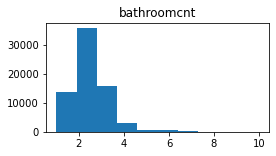

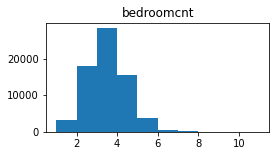

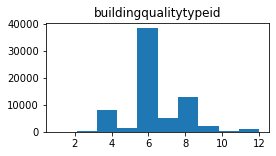

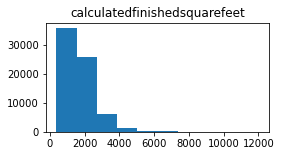

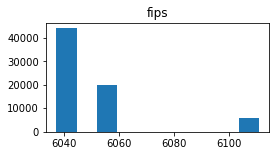

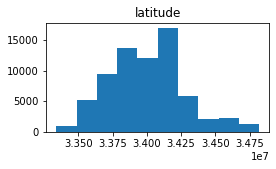

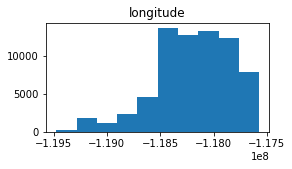

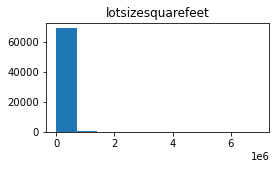

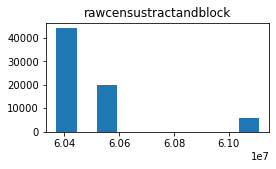

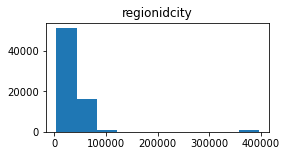

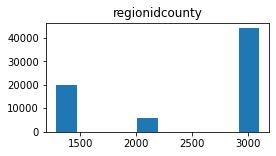

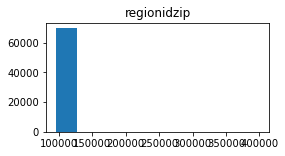

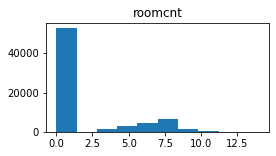

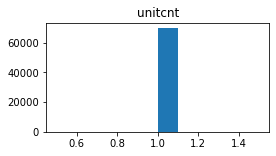

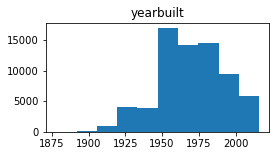

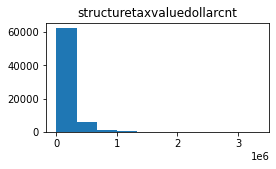

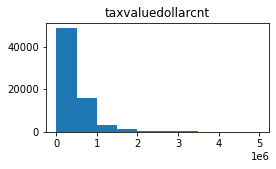

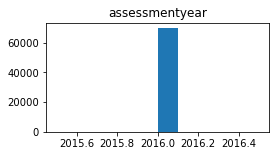

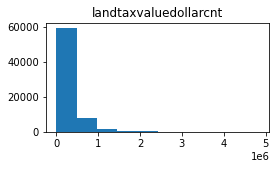

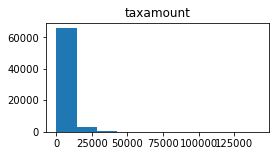

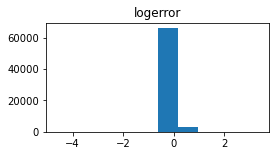

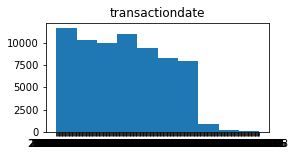

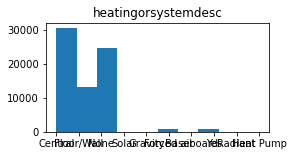

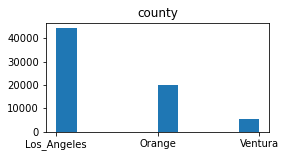

In [8]:
for col in df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [9]:
### takeaways:

## - tax related variables may have outliers

## - most variables skewed to the right

## - yearbuilt skewed to the left however

## Q2

### - Does logerror distrtibution vary by county?

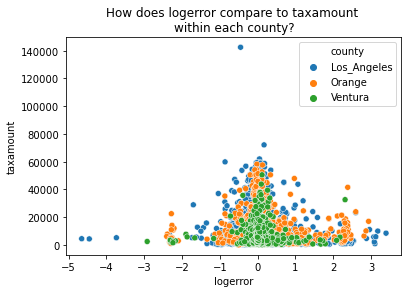

In [11]:
sns.scatterplot(x='logerror', y='taxamount',
               data=df, hue='county')
plt.title("How does logerror compare to taxamount \nwithin each county?")
plt.show()

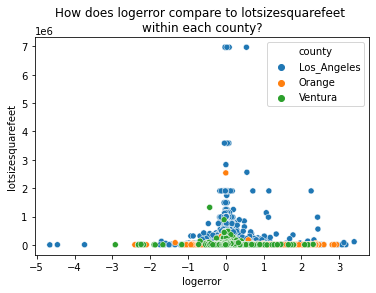

In [13]:
sns.scatterplot(x='logerror', y='lotsizesquarefeet',
               data=df, hue='county')
plt.title("How does logerror compare to lotsizesquarefeet \nwithin each county?")
plt.show()

In [12]:
### takeaways:

## - Los Angeles seems to have the most significant logerrors with lower value homes

## - all counties have larger logerrors the less the home is worth

## - all counties have larger logerror the smaller the home is in sq ft

## Q3

### - Is there a diferrence in logerror for homes in different price brackets?